In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [141]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [142]:
data_copy = data

In [143]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


## Doing exploratory data analysis on the given data

In [145]:
import seaborn as sns

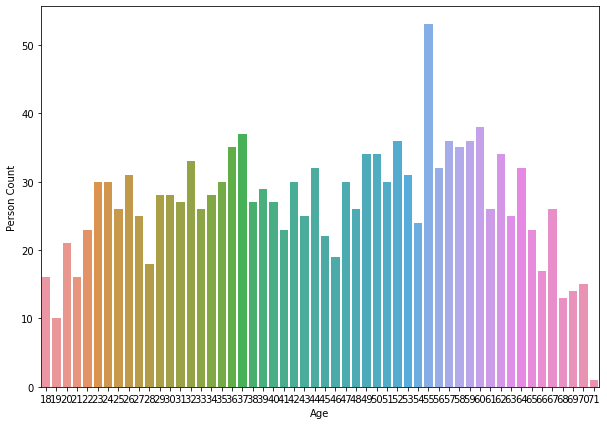

In [146]:
plt.figure(figsize = (10,7))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

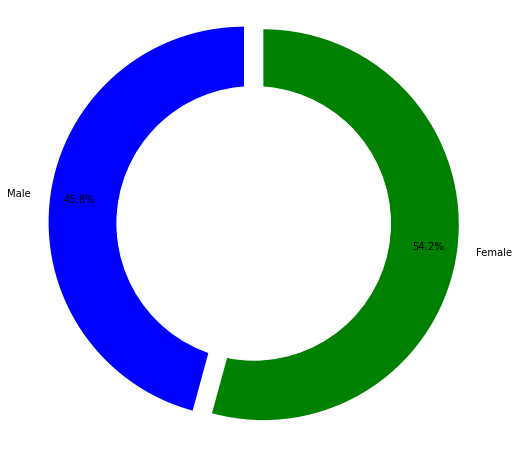

In [147]:
labels = ['Male','Female']
sizes = [data.query("Gender == 'Male'").Gender.count(),data.query("Gender == 'Female'").Gender.count()]
colors = ["blue","green"]
explode = [0.05,0.05]
plt.figure(figsize = (8,8))
my_circle = plt.Circle((0,0),0.7,color = "white")
plt.pie(sizes,colors = colors,labels = labels,autopct = '%1.1f%%',startangle = 90,pctdistance = 0.85,explode = explode)
p = plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

In [148]:
sizes

[665, 788]

# Converting the labels into numerical form

In [149]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data["fast"] = number.fit_transform(data["fast"].astype('str'))
data["yummy"] = number.fit_transform(data["yummy"].astype('str'))
data["convenient"] = number.fit_transform(data["convenient"].astype('str'))
data["spicy"] = number.fit_transform(data["spicy"].astype('str'))
data["fattening"] = number.fit_transform(data["fattening"].astype('str'))
data["greasy"] = number.fit_transform(data["greasy"].astype('str'))
data["cheap"] = number.fit_transform(data["cheap"].astype('str'))
data["tasty"] = number.fit_transform(data["tasty"].astype('str'))
data["expensive"] = number.fit_transform(data["expensive"].astype('str'))
data["healthy"] = number.fit_transform(data["healthy"].astype('str'))
data["disgusting"] = number.fit_transform(data["disgusting"].astype('str'))
data["Gender"] = number.fit_transform(data["Gender"].astype('str'))
data["VisitFrequency"] = number.fit_transform(data["VisitFrequency"].astype('str'))

In [150]:
# data = data.drop(["healhty"],axis = 1)

In [151]:
data["Like"] = number.fit_transform(data["Like"])
data["Like"]

0       6
1       1
2       0
3       3
4       1
       ..
1448    9
1449    1
1450    2
1451    3
1452    6
Name: Like, Length: 1453, dtype: int32

In [152]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1


In [153]:
data_numeric = data

# One hot Encoding the data

In [154]:
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot,columns = ["yummy","convenient","spicy","fattening","greasy","fast","tasty","expensive","healthy","disgusting",
                                                   "Like","VisitFrequency","Gender"],prefix =["yummy","convenient","spicy","fattening","greasy","fast","tasty","expensive","healthy","disgusting",
                                                   "Like","VisitFrequency","Gender"] )

In [155]:
data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cheap             1453 non-null   int32
 1   Age               1453 non-null   int64
 2   yummy_0           1453 non-null   uint8
 3   yummy_1           1453 non-null   uint8
 4   convenient_0      1453 non-null   uint8
 5   convenient_1      1453 non-null   uint8
 6   spicy_0           1453 non-null   uint8
 7   spicy_1           1453 non-null   uint8
 8   fattening_0       1453 non-null   uint8
 9   fattening_1       1453 non-null   uint8
 10  greasy_0          1453 non-null   uint8
 11  greasy_1          1453 non-null   uint8
 12  fast_0            1453 non-null   uint8
 13  fast_1            1453 non-null   uint8
 14  tasty_0           1453 non-null   uint8
 15  tasty_1           1453 non-null   uint8
 16  expensive_0       1453 non-null   uint8
 17  expensive_1       1453 non-null  

## Scaling the one hot encoded data

In [156]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
data_scaled = SS.fit_transform(data_onehot)

In [157]:
data_scaled

array([[ 0.81860549,  1.15325815,  1.11147857, ..., -0.45806675,
         0.918645  , -0.918645  ],
       [ 0.81860549,  0.44983942, -0.89970246, ..., -0.45806675,
         0.918645  , -0.918645  ],
       [-1.22158966,  1.22360002,  1.11147857, ..., -0.45806675,
         0.918645  , -0.918645  ],
       ...,
       [-1.22158966,  0.5201813 , -0.89970246, ..., -0.45806675,
         0.918645  , -0.918645  ],
       [ 0.81860549, -0.2535793 , -0.89970246, ..., -0.45806675,
        -1.08855979,  1.08855979],
       [-1.22158966, -1.0273399 ,  1.11147857, ..., -0.45806675,
        -1.08855979,  1.08855979]])

## Doing dimensionality reduction on the data

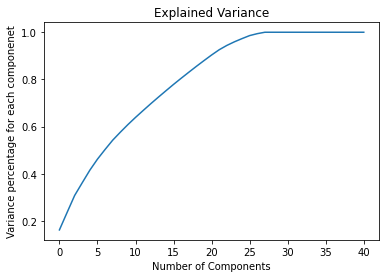

In [158]:
#Fitting the PCA algorithm with our data
from sklearn.decomposition import PCA
pca  = PCA().fit(data_scaled)
#fitting the cumulative summation of explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance percentage for each componenet")
plt.title("Explained Variance")
plt.show()


In [159]:
pca = PCA(n_components = 27)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

In [160]:
data_pca

array([[ 1.52844231, -0.80308069,  1.20909967, ..., -0.01463113,
         0.227818  ,  1.80071564],
       [-0.89243637, -0.98585358, -2.04534174, ..., -0.4767408 ,
        -0.14190119,  1.64944868],
       [-0.17007085,  1.04919268, -0.35519888, ..., -0.33308584,
         1.15569107, -0.40613802],
       ...,
       [-1.73231581,  0.53024779, -1.68361788, ..., -0.43621141,
        -0.10329639,  0.06203706],
       [-3.52530513,  2.47068664,  2.64397015, ...,  0.95128099,
         0.46608652,  0.1411741 ],
       [ 4.48960034,  1.73475937, -1.9587579 , ...,  0.51873469,
         0.24878954, -0.0455016 ]])

## K means clustering by considering all variables as the segmentation variables:

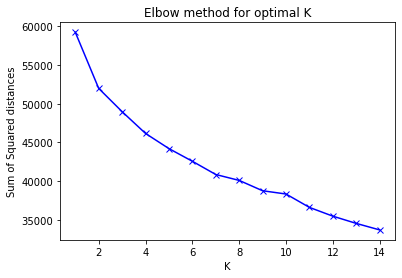

In [161]:
##Now we are going to apply K_means clustering on our data and we will use elbow method to fit the k value
# from sklearn.datasets.samples_generator import make_blobs
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
Sum_of_squared_distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_pca)
    Sum_of_squared_distance.append(km.inertia_)
#Visulaizing the plot
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel("K")
plt.ylabel("Sum of Squared distances")
plt.title("Elbow method for optimal K")
plt.show()

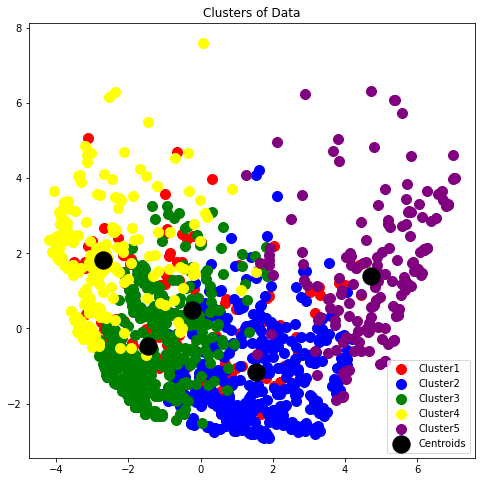

In [171]:
##For k = 5 it has formed an elbow 
kmeans = KMeans(n_clusters = 5,init = 'k-means++',n_init = 10,max_iter = 1000,tol = 0.0001,verbose = 0,random_state = None,
               copy_x = True, algorithm = "auto")
y_means = kmeans.fit_predict(data_pca)

#Plotting through k_means
##Clustering on scaled numeric data with reduced dimensions
plt.figure(figsize = (8,8))
plt.scatter(data_pca[y_means == 0,0],data_pca[y_means == 0,1],s = 100, c = "red",label = "Cluster1")
plt.scatter(data_pca[y_means == 1,0],data_pca[y_means == 1,1],s = 100, c = "blue",label = "Cluster2")
plt.scatter(data_pca[y_means == 2,0],data_pca[y_means == 2,1],s = 100, c = "green",label = "Cluster3")
plt.scatter(data_pca[y_means == 3,0],data_pca[y_means == 3,1],s = 100, c = "yellow",label = "Cluster4")
plt.scatter(data_pca[y_means == 4,0],data_pca[y_means == 4,1],s = 100, c = "purple",label = "Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c = "black",label = "Centroids")
plt.title("Clusters of Data")
plt.legend()
plt.show()


## Hence we can see that if we consider all variables as the segmentation variables then the optimal number of clusters is 2 and above is the distribution of clusters

## Now we will visulaize it separately for different variables

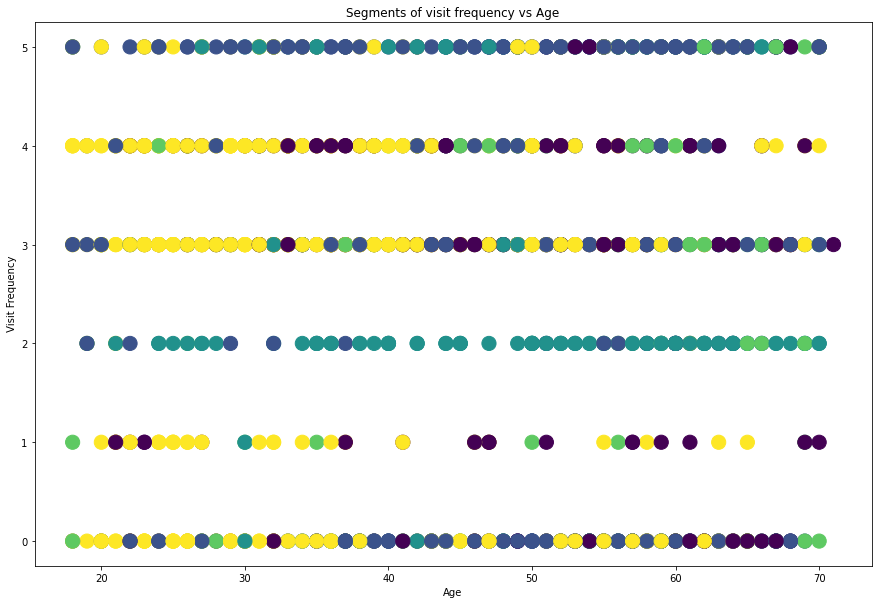

In [163]:
## Age vs Visit Frequency
plt.figure(figsize = (15,10))
plt.scatter(x = 'Age',y = 'VisitFrequency',data = data_copy,c = y_means,s = 200)
plt.xlabel("Age")
plt.ylabel(" Visit Frequency")
plt.title("Segments of visit frequency vs Age")
plt.show()

Text(0.5, 0.92, '3 dimensional scatter plot')

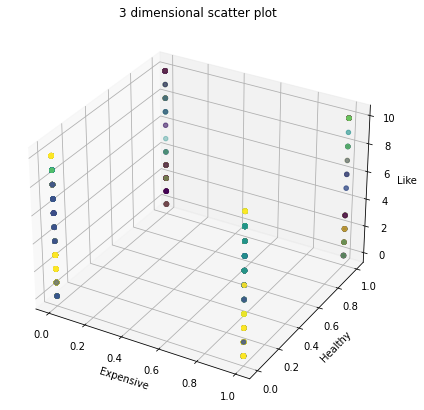

In [164]:
##3 dimensional scatter plot using attributes 'expensive','healthy','like'
##As 3d scatter plots work only with numeric data we had to use the numeric counterpart
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
x = data_numeric["expensive"]
y = data_numeric["healthy"]
z = data_numeric["Like"]
ax.scatter3D(xs = x,ys = y,zs = z,c = y_means)
ax.set_xlabel("Expensive")
ax.set_ylabel("Healthy")
ax.set_zlabel("Like")
plt.title("3 dimensional scatter plot")

## Clustering by fitting a Gaussian Mixture Model to our reduced PCA data:

In [165]:
from sklearn.mixture import GaussianMixture

Text(0.5, 0, 'Number of components')

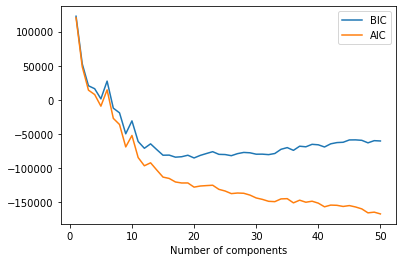

In [166]:
n_components = np.arange(1,51)
models = [GaussianMixture(n,covariance_type = "full",random_state = 0).fit(data_pca) for n in n_components]
plt.plot(n_components,[m.bic(data_pca) for m in models],label = 'BIC')
plt.plot(n_components,[m.aic(data_pca) for m in models],label = 'AIC')
plt.legend(loc = "best")
plt.xlabel("Number of components")

### We can see that BIC predicts around 20 different components for our data

In [167]:
gmm = GaussianMixture(n_components = 20)
gmm.fit(data_pca)

GaussianMixture(n_components=20)

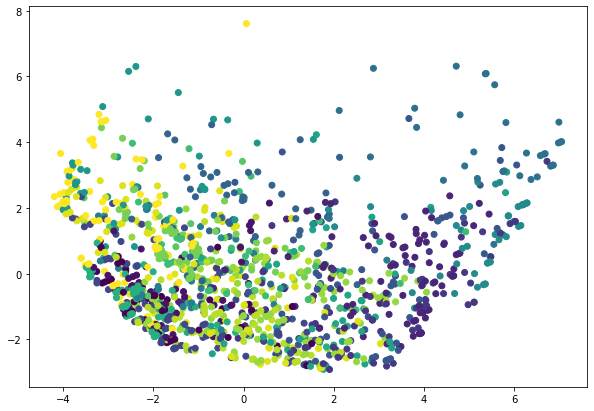

In [168]:
y_predict = gmm.predict(data_pca)##predicted labels
plt.figure(figsize = (10,7))
plt.scatter(data_pca[:,0],data_pca[:,1],c = y_predict,cmap = "viridis")

## Visualizing it separately for different variables

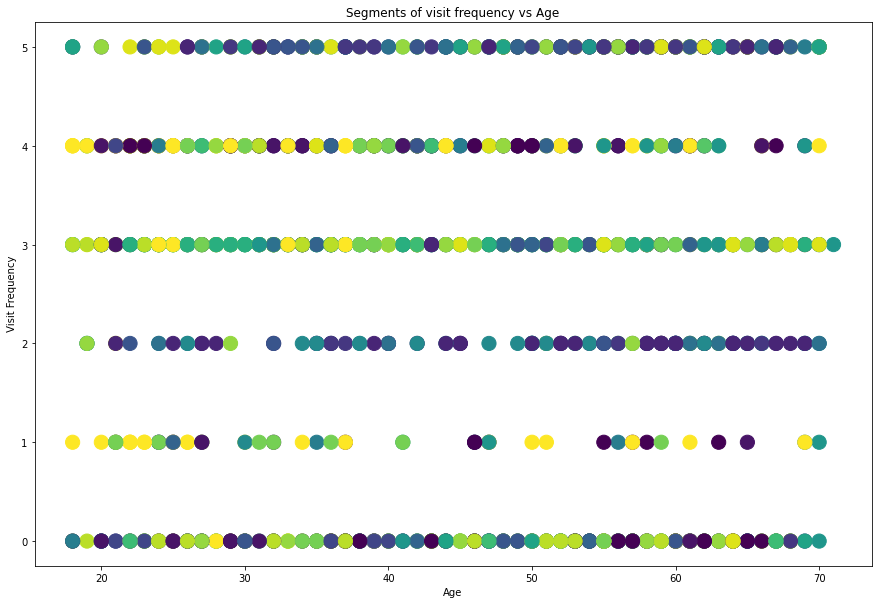

In [169]:
## Age vs Visit Frequency
plt.figure(figsize = (15,10))
plt.scatter(x = 'Age',y = 'VisitFrequency',data = data_copy,c = y_predict,s = 200)
plt.xlabel("Age")
plt.ylabel(" Visit Frequency")
plt.title("Segments of visit frequency vs Age")
plt.show()

Text(0.5, 0.92, '3 dimensional scatter plot')

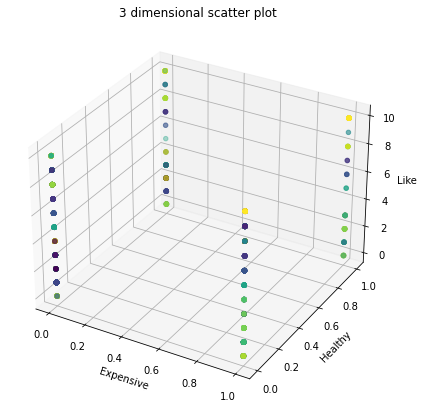

In [170]:
##3 dimensional scatter plot using attributes 'expensive','healthy','like'
##As 3d scatter plots work only with numeric data we had to use the numeric counterpart
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
x = data_numeric["expensive"]
y = data_numeric["healthy"]
z = data_numeric["Like"]
ax.scatter3D(xs = x,ys = y,zs = z,c = y_predict)
ax.set_xlabel("Expensive")
ax.set_ylabel("Healthy")
ax.set_zlabel("Like")
plt.title("3 dimensional scatter plot")

## Hiererichal Clustering algorithm

In [173]:
from scipy.cluster.hierarchy import dendrogram,linkage


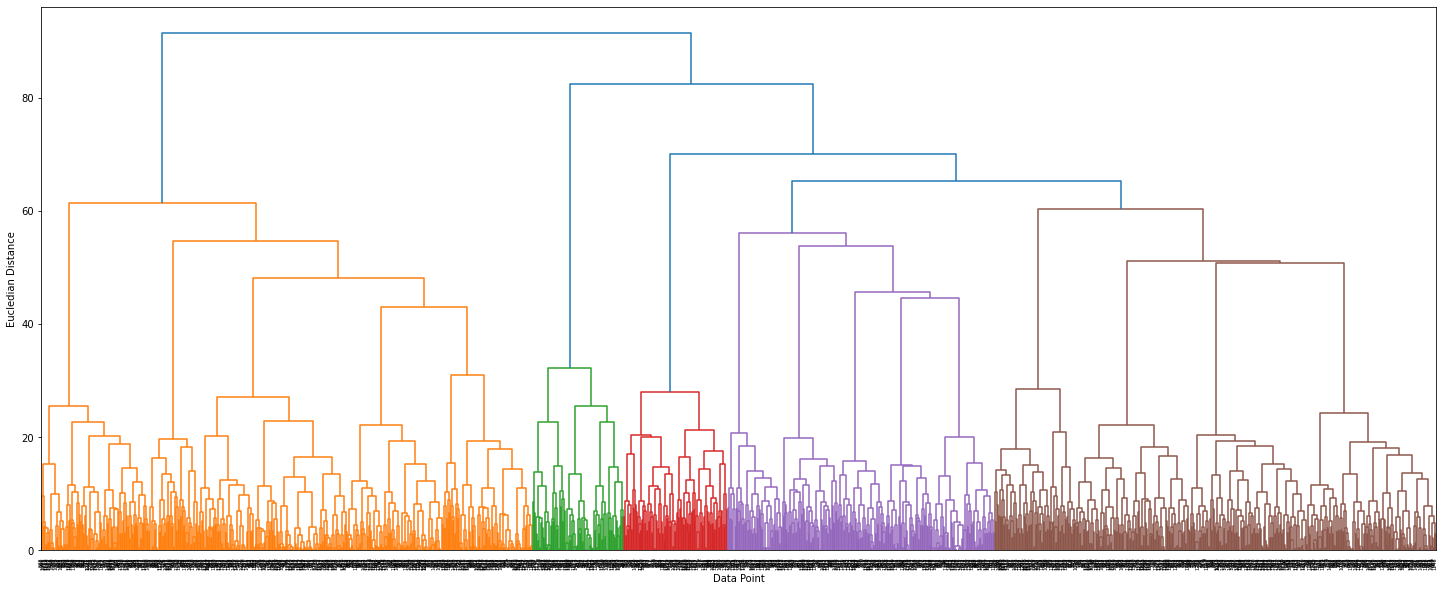

In [175]:
y_hier = linkage(data_pca,method = "ward")
plt.figure(figsize = (25,10))
dendrogram(y_hier,leaf_rotation = 90)
plt.xlabel("Data Point")
plt.ylabel("Eucledian Distance")
plt.show()

In [181]:
from sklearn.cluster import AgglomerativeClustering
hierarical_cluster = AgglomerativeClustering(n_clusters = 5,affinity = "euclidean", linkage = "ward")
data_predict = hierarical_cluster.fit_predict(data_pca)
# plt.figure(figsize = (15,10))


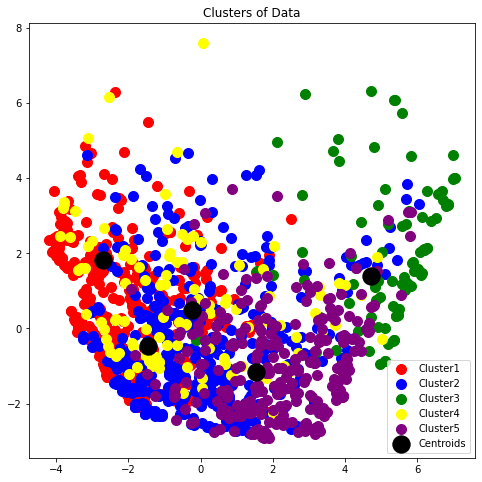

In [182]:
plt.figure(figsize = (8,8))
plt.scatter(data_pca[data_predict == 0,0],data_pca[data_predict == 0,1],s = 100, c = "red",label = "Cluster1")
plt.scatter(data_pca[data_predict == 1,0],data_pca[data_predict == 1,1],s = 100, c = "blue",label = "Cluster2")
plt.scatter(data_pca[data_predict == 2,0],data_pca[data_predict == 2,1],s = 100, c = "green",label = "Cluster3")
plt.scatter(data_pca[data_predict == 3,0],data_pca[data_predict == 3,1],s = 100, c = "yellow",label = "Cluster4")
plt.scatter(data_pca[data_predict == 4,0],data_pca[data_predict == 4,1],s = 100, c = "purple",label = "Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c = "black",label = "Centroids")
plt.title("Clusters of Data")
plt.legend()
plt.show()


## Visulaizing it separately for different variables

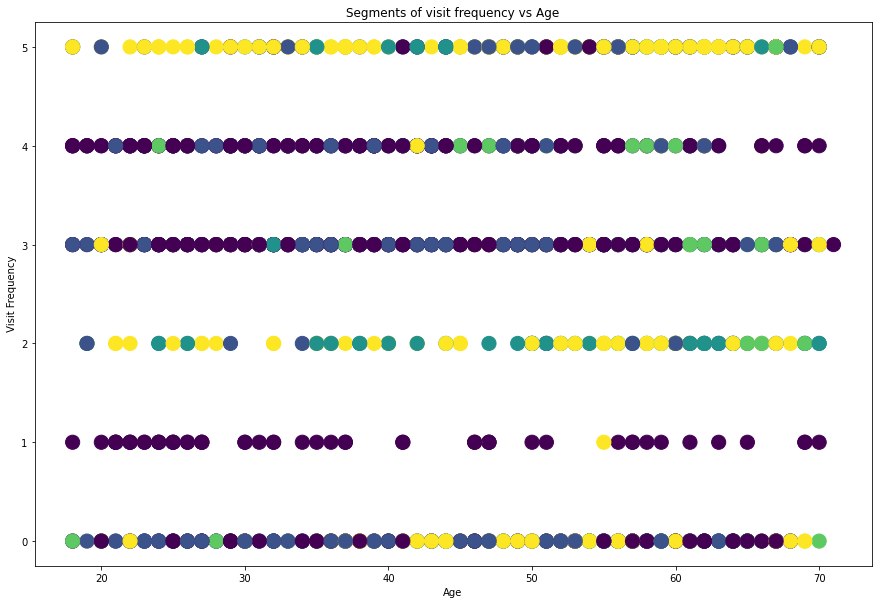

In [183]:
## Age vs Visit Frequency
plt.figure(figsize = (15,10))
plt.scatter(x = 'Age',y = 'VisitFrequency',data = data_copy,c = data_predict,s = 200)
plt.xlabel("Age")
plt.ylabel(" Visit Frequency")
plt.title("Segments of visit frequency vs Age")
plt.show()

Text(0.5, 0.92, '3 dimensional scatter plot')

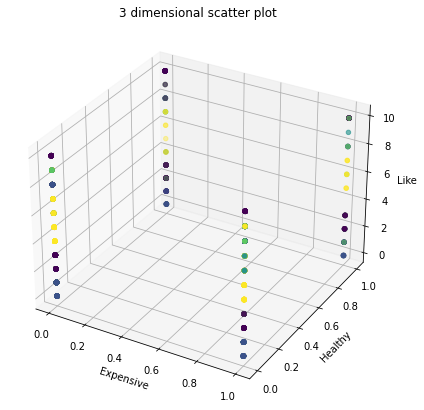

In [184]:
##3 dimensional scatter plot using attributes 'expensive','healthy','like'
##As 3d scatter plots work only with numeric data we had to use the numeric counterpart
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
x = data_numeric["expensive"]
y = data_numeric["healthy"]
z = data_numeric["Like"]
ax.scatter3D(xs = x,ys = y,zs = z,c = data_predict)
ax.set_xlabel("Expensive")
ax.set_ylabel("Healthy")
ax.set_zlabel("Like")
plt.title("3 dimensional scatter plot")